## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [33]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [34]:
train, test = keras.datasets.cifar10.load_data()

In [35]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [36]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [37]:
from keras.layers import BatchNormalization
from keras.layers import Dropout
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l2_ratio=1e-4,  drp_ratio=Dropout_EXP):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [38]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]
EPOCHS = 50
BATCH_SIZE = [128, 256]
MOMENTUM = 0.95
Dropout_EXP = 0.25

In [39]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    for bs in BATCH_SIZE:
        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=bs, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-l2-%s[%s]" % (str(regulizer_ratio), str(bs))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_2 (Dropout)          (None, 256

50000/50000 [==============================] - 20s 395us/step - loss: 1.3252 - acc: 0.5262 - val_loss: 1.3589 - val_acc: 0.5156
Epoch 47/50
50000/50000 [==============================] - 22s 432us/step - loss: 1.3225 - acc: 0.5278 - val_loss: 1.3884 - val_acc: 0.5016
Epoch 48/50
50000/50000 [==============================] - 23s 467us/step - loss: 1.3153 - acc: 0.5283 - val_loss: 1.3933 - val_acc: 0.4990
Epoch 49/50
50000/50000 [==============================] - 25s 491us/step - loss: 1.3124 - acc: 0.5299 - val_loss: 1.3561 - val_acc: 0.5193
Epoch 50/50
50000/50000 [==============================] - 27s 534us/step - loss: 1.3093 - acc: 0.5320 - val_loss: 1.4123 - val_acc: 0.4905
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 17s 340us/step - loss: 1.2734 - acc: 0.5443 - val_loss: 1.3209 - val_acc: 0.5280 0s - loss: 1.2733 - acc: 0.544
Epoch 2/50
50000/50000 [==============================] - 16s 328us/step - loss: 1.2649 - ac

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 22s 439us/step - loss: 2.1060 - acc: 0.2944 - val_loss: 1.7007 - val_acc: 0.3888
Epoch 2/50
50000/50000 [==============================] - 20s 400us/step - loss: 1.7862 - acc: 0.3693 - val_loss: 1.6169 - val_acc: 0.4208
Epoch 3/50
50000/50000 [==============================] - 19s 381us/step - loss: 1.6929 - acc: 0.3974 - val_loss: 1.5571 - val_acc: 0.4460
Epoch 4/50
50000/50000 [==============================] - 19s 383us/step - loss: 1.6378 - acc: 0.4155 - val_loss: 1.5266 - val_acc: 0.4635
Epoch 5/50
50000/50000 [==============================] - 19s 379us/step - loss: 1.6042 - acc: 0.4275 - val_loss: 1.5136 - val_acc: 0.4545
Epoch 6/50
50000/50000 [==============================] - 19s 378us/step - loss: 1.5730 - acc: 0.4391 - val_loss: 1.4973 - val_acc: 0.4578
Epoch 7/50
50000/50000 [==============================] - 19s 378us/step - loss: 1.5518 - acc: 0.4450 - val_loss: 1.

Epoch 8/50
50000/50000 [==============================] - 13s 263us/step - loss: 1.2289 - acc: 0.5610 - val_loss: 1.3025 - val_acc: 0.5304
Epoch 9/50
50000/50000 [==============================] - 13s 261us/step - loss: 1.2293 - acc: 0.5613 - val_loss: 1.3435 - val_acc: 0.5204 0s - loss: 1.2292 - acc: 0.561
Epoch 10/50
50000/50000 [==============================] - 13s 263us/step - loss: 1.2257 - acc: 0.5609 - val_loss: 1.3056 - val_acc: 0.5320
Epoch 11/50
50000/50000 [==============================] - 13s 263us/step - loss: 1.2279 - acc: 0.5600 - val_loss: 1.3212 - val_acc: 0.5269
Epoch 12/50
50000/50000 [==============================] - 13s 264us/step - loss: 1.2197 - acc: 0.5638 - val_loss: 1.3295 - val_acc: 0.5267
Epoch 13/50
50000/50000 [==============================] - 13s 262us/step - loss: 1.2144 - acc: 0.5646 - val_loss: 1.3142 - val_acc: 0.5301
Epoch 14/50
50000/50000 [==============================] - 13s 259us/step - loss: 1.2080 - acc: 0.5687 - val_loss: 1.3007 - val_acc

50000/50000 [==============================] - 18s 368us/step - loss: 1.7883 - acc: 0.3651 - val_loss: 1.6111 - val_acc: 0.4334
Epoch 3/50
50000/50000 [==============================] - 18s 370us/step - loss: 1.6880 - acc: 0.4004 - val_loss: 1.5829 - val_acc: 0.4388
Epoch 4/50
50000/50000 [==============================] - 19s 370us/step - loss: 1.6376 - acc: 0.4175 - val_loss: 1.5534 - val_acc: 0.4541
Epoch 5/50
50000/50000 [==============================] - 18s 369us/step - loss: 1.6030 - acc: 0.4298 - val_loss: 1.5241 - val_acc: 0.4518
Epoch 6/50
50000/50000 [==============================] - 19s 370us/step - loss: 1.5803 - acc: 0.4360 - val_loss: 1.4898 - val_acc: 0.4679
Epoch 7/50
50000/50000 [==============================] - 19s 370us/step - loss: 1.5596 - acc: 0.4465 - val_loss: 1.4870 - val_acc: 0.4757
Epoch 8/50
50000/50000 [==============================] - 15s 306us/step - loss: 1.5348 - acc: 0.4514 - val_loss: 1.4808 - val_acc: 0.4747
Epoch 9/50
50000/50000 [==============

50000/50000 [==============================] - 13s 257us/step - loss: 1.2556 - acc: 0.5528 - val_loss: 1.3227 - val_acc: 0.5272
Epoch 11/50
50000/50000 [==============================] - 13s 259us/step - loss: 1.2556 - acc: 0.5511 - val_loss: 1.3255 - val_acc: 0.5281
Epoch 12/50
50000/50000 [==============================] - 13s 260us/step - loss: 1.2523 - acc: 0.5539 - val_loss: 1.3157 - val_acc: 0.5286
Epoch 13/50
50000/50000 [==============================] - 13s 259us/step - loss: 1.2479 - acc: 0.5538 - val_loss: 1.3531 - val_acc: 0.5183
Epoch 14/50
50000/50000 [==============================] - 13s 261us/step - loss: 1.2472 - acc: 0.5548 - val_loss: 1.3204 - val_acc: 0.5323
Epoch 15/50
50000/50000 [==============================] - 13s 260us/step - loss: 1.2441 - acc: 0.5531 - val_loss: 1.3534 - val_acc: 0.5245
Epoch 16/50
50000/50000 [==============================] - 13s 261us/step - loss: 1.2391 - acc: 0.5542 - val_loss: 1.3007 - val_acc: 0.5340
Epoch 17/50
50000/50000 [=======

50000/50000 [==============================] - 19s 375us/step - loss: 1.5908 - acc: 0.4330 - val_loss: 1.5138 - val_acc: 0.4636
Epoch 6/50
50000/50000 [==============================] - 19s 373us/step - loss: 1.5672 - acc: 0.4419 - val_loss: 1.4835 - val_acc: 0.4652
Epoch 7/50
50000/50000 [==============================] - 19s 373us/step - loss: 1.5451 - acc: 0.4486 - val_loss: 1.4826 - val_acc: 0.4695
Epoch 8/50
50000/50000 [==============================] - 14s 287us/step - loss: 1.5277 - acc: 0.4551 - val_loss: 1.4533 - val_acc: 0.4771
Epoch 9/50
50000/50000 [==============================] - 19s 372us/step - loss: 1.5110 - acc: 0.4591 - val_loss: 1.4438 - val_acc: 0.4869
Epoch 10/50
50000/50000 [==============================] - 19s 371us/step - loss: 1.4989 - acc: 0.4643 - val_loss: 1.4428 - val_acc: 0.4866
Epoch 11/50
50000/50000 [==============================] - 19s 374us/step - loss: 1.4867 - acc: 0.4689 - val_loss: 1.4546 - val_acc: 0.4870
Epoch 12/50
50000/50000 [===========

50000/50000 [==============================] - 13s 265us/step - loss: 1.2095 - acc: 0.5668 - val_loss: 1.3120 - val_acc: 0.5307
Epoch 14/50
50000/50000 [==============================] - 13s 265us/step - loss: 1.2070 - acc: 0.5669 - val_loss: 1.2963 - val_acc: 0.53711.2074 - a
Epoch 15/50
50000/50000 [==============================] - 13s 264us/step - loss: 1.2000 - acc: 0.5689 - val_loss: 1.3224 - val_acc: 0.5296
Epoch 16/50
50000/50000 [==============================] - 13s 266us/step - loss: 1.2033 - acc: 0.5669 - val_loss: 1.3043 - val_acc: 0.5367
Epoch 17/50
50000/50000 [==============================] - 13s 266us/step - loss: 1.2023 - acc: 0.5676 - val_loss: 1.3084 - val_acc: 0.5321
Epoch 18/50
50000/50000 [==============================] - 13s 264us/step - loss: 1.2021 - acc: 0.5682 - val_loss: 1.3263 - val_acc: 0.5285
Epoch 19/50
50000/50000 [==============================] - 13s 267us/step - loss: 1.1895 - acc: 0.5726 - val_loss: 1.3237 - val_acc: 0.5249
Epoch 20/50
50000/5000

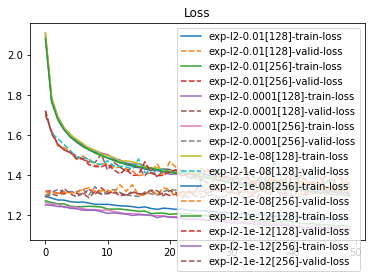

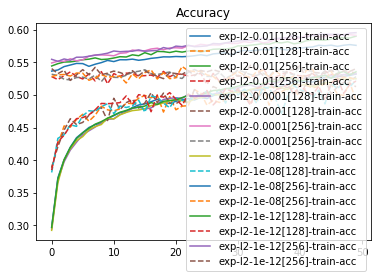

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond + '-train-loss')
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--',label=cond + '-valid-loss')
plt.title("Loss") 
plt.legend()
plt.show()

for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-',  label=cond + '-train-acc')
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond + '-train-acc')
plt.title("Accuracy") 
plt.legend()
plt.show() 